# COMP6246 - Machine Learning Technologies Coursework - Code

Before beginning our work, we install all the necessary packages required for our code to render perfectly without any errors.
Packages we are installing: 
* Pandas- Used for data manipulation with indexing.
* Scikit-learn- Used for Data analysis and Data mining. It consists of ML algorithms.
* NLTK- To process Natural Language Processing (NLP) code.
* Seaborn- Library based on Matplotlib to draw statistic graphics.
* Langid- Language identification tool.

In [195]:
!pip install pandas
!pip install scikit-learn
!pip install nltk
!pip install seaborn
!pip install langid


Now, we import entire modules or specific objects from a module into your notebook:
* Numpy- Used for numerical operations
* Matplotlib.pyplot- A versatile plotting library.
* re- Used for regular expressions
* train_test_split- Used to split data into training and testing sets.
* CountVectorizer, TfidfVectorizer- To convert text data into numerical feature vectors.
* StandardScale- Used for Feature scaling.
* LabelEncoder- Used for encoding categorical labels.
* RandomForest- An ensemble learning method for Classification.
* PC((Principal Component Analysis)-Used for dimensionality reduction.
* Accuracy_score, Classification_report, Confusion_matrix, roc_curve, auc- Function used to evaluate the performance of a ML model.
* rt - The Support Vector Classification algorithm.
* Make_pipeline- Used to create a pipeline for sequential application of a list of transforms with a final estimator.
* Axes3D- Used to create 3D plots using Matplotlib.
* GradientBoostingClassifier- Implements the Gradient boosting algorithm for classification tasks.

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import langid
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import GradientBoostingClassifier

We check the max width of the column, and then set the width dynamically so that we can deal with long strings or text.

In [197]:
pd.get_option('display.max_colwidth')

In [198]:
pd.set_option('display.max_colwidth', None)

## Importing the Training dataset

We specify the filepath and import the CSV file as out training dataset with the help of Pandas Dataframe(df).
Here 'sep=\t' is delimiter used to separate values in a file, suggesting that the filepath is separated by tab spaces.

In [199]:
train_file_path = r'C:\Users\DELL\mltdataset\mediaeval-2015-trainingset.txt'
df_train = pd.read_csv(train_file_path, sep='\t')
df_train.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,263046056240115712,¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy. http://t.co/JQQeRPwN,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,262995061304852481,"@milenagimon: Miren a Sandy en NY! Tremenda imagen del huracán. Parece el ""Día de la Independencia 2"" http://t.co/41jUweux REAL! RT.",192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy http://t.co/PTdAXABZ",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽 http://t.co/Ex61doZk,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake


## Data Analaysis and Preprocessing

To analyze the volume of data, we check the number of rows and columns in the Training data.

In [200]:
num_rows = df_train.shape[0]
num_columns = df_train.shape[1]
print("Number of rows in training data:", num_rows)
print("Number of columns  in training data:", num_columns)

Number of rows in training data: 14277
Number of columns  in training data: 7


To analyze the quality of data, we check for missing data.

In [201]:
missing_data_train = df_train.isnull().sum() #For each column
print("Missing data in each column:")
print(missing_data_train)
df_missing_data = df_train.isnull().any().any() #For entire DF
print("\nAny missing data present in the DataFrame in Training data:", df_missing_data) #Boolean value

Missing data in each column:
tweetId       0
tweetText     0
userId        0
imageId(s)    0
username      0
timestamp     0
label         0
dtype: int64

Any missing data present in the DataFrame in Training data: False


To check for consistency, we check for any Unique Values, data types, duplicates, outliers and consistent formats.

In [202]:
#Unique Values
unique_values_train = df_train.nunique()
print("Unique values in each column:")
print(unique_values_train)

Unique values in each column:
tweetId       14275
tweetText     12376
userId        13498
imageId(s)      377
username      13498
timestamp     13909
label             3
dtype: int64


In [203]:
#Data Types
data_types_train = df_train.dtypes
print("Data types of each column:")
print(data_types_train)

Data types of each column:
tweetId        int64
tweetText     object
userId         int64
imageId(s)    object
username      object
timestamp     object
label         object
dtype: object


In [204]:
#Duplicates
duplicate_rows_train = df_train[df_train.duplicated()]
print("Duplicate rows:")
print(duplicate_rows_train)

Duplicate rows:
                 tweetId                                tweetText    userId  \
7821  263351427320131584  Ground Zero #Sandy http://t.co/KA1jNv3I  15933769   

          imageId(s)      username                       timestamp label  
7821  sandyA_real_04  AngelaYvonne  Tue Oct 30 18:47:27 +0000 2012  real  


As we identified a duplicate row, we remove it from the dataframe.

In [205]:
df_train = df_train.drop_duplicates(subset=['tweetId'])
print("DataFrame without duplicates:")
print(df_train)

DataFrame without duplicates:
                  tweetId  \
0      263046056240115712   
1      262995061304852481   
2      262979898002534400   
3      262996108400271360   
4      263018881839411200   
...                   ...   
14272  443231991593304064   
14273  443086239127076865   
14274  442978105238753280   
14275  442753479782989824   
14276  442700377860104192   

                                                                                                                                    tweetText  \
0      ¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy. http://t.co/JQQeRPwN   
1       @milenagimon: Miren a Sandy en NY!  Tremenda imagen del huracán. Parece el "Día de la Independencia 2" http://t.co/41jUweux REAL! RT.   
2                        Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy  http://t.co/PTdAXABZ   
3                                        

In [206]:
#Check Duplicates again for removal
duplicate_rows_train = df_train[df_train.duplicated()]
print("Duplicate rows:")
print(duplicate_rows_train)

Duplicate rows:
Empty DataFrame
Columns: [tweetId, tweetText, userId, imageId(s), username, timestamp, label]
Index: []


In [207]:
#Outliers
numerical_columns = df_train.select_dtypes(include=['float64', 'int64'])
outliers_train = numerical_columns.apply(lambda x: x.abs() > 3 * x.std())
print("Potential outliers:")
print(outliers_train)

Potential outliers:
       tweetId  userId
0         True   False
1         True   False
2         True   False
3         True   False
4         True   False
...        ...     ...
14272     True    True
14273     True   False
14274     True    True
14275     True   False
14276     True   False

[14275 rows x 2 columns]


For Correctness, verify timestamp and validate unique constraints.

In [208]:
#Verify Timestamps
timestamp_min = df_train['timestamp'].min()
timestamp_max = df_train['timestamp'].max()
print("Min timestamp:", timestamp_min)
print("Max timestamp:", timestamp_max)

Min timestamp: Fri Apr 11 07:30:12 +0000 2014
Max timestamp: Wed Oct 31 23:59:55 +0000 2012


In [209]:
#Validate Unique constraints
unique_values_tweet_id = df_train['tweetId'].nunique()
unique_values_user_id = df_train['userId'].nunique()
print("Unique values in tweetId:", unique_values_tweet_id)
print("Unique values in userId:", unique_values_user_id)

Unique values in tweetId: 14275
Unique values in userId: 13498


Based on size, we find the length of the 'tweetText' column to observe the pattern in the training data.

In [210]:
def get_length_of_tweet(tweet_text):
    return len(tweet_text.split())

df_train['tweet_length'] = df_train['tweetText'].apply(get_length_of_tweet)
print(df_train.head())

              tweetId  \
0  263046056240115712   
1  262995061304852481   
2  262979898002534400   
3  262996108400271360   
4  263018881839411200   

                                                                                                                                tweetText  \
0  ¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy. http://t.co/JQQeRPwN   
1   @milenagimon: Miren a Sandy en NY!  Tremenda imagen del huracán. Parece el "Día de la Independencia 2" http://t.co/41jUweux REAL! RT.   
2                    Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy  http://t.co/PTdAXABZ   
3                                                                                          Scary shit #hurricane #NY http://t.co/e4JLBUfH   
4                                               My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽 http://t.co/Ex61doZk   

  

Now create a violin plot and a scatter plot to observe the patterns between TweetLength and Label column.

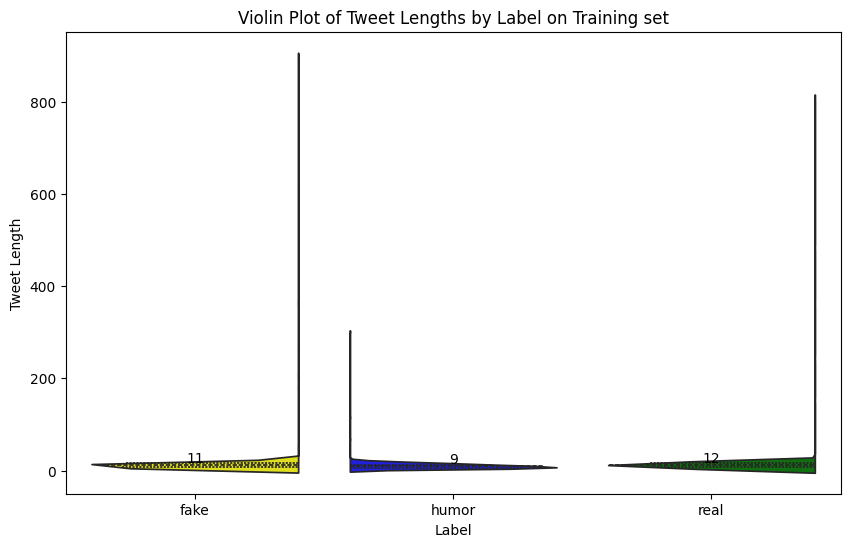

In [211]:
#Violin Plot
plt.figure(figsize=(10, 6))
colors = {'fake': 'yellow', 'humor': 'blue', 'real': 'green'}
sns.violinplot(x='label', y='tweet_length', hue='label', data=df_train, palette=colors, split=True, inner="quartile")
plt.title('Violin Plot of Tweet Lengths by Label on Training set')
plt.xlabel('Label')
plt.ylabel('Tweet Length')
for label in colors:
    median = df_train[df_train['label'] == label]['tweet_length'].median()
    plt.text(list(colors.keys()).index(label), median, f'{int(median)}', ha='center', va='bottom', color='black')

plt.show()

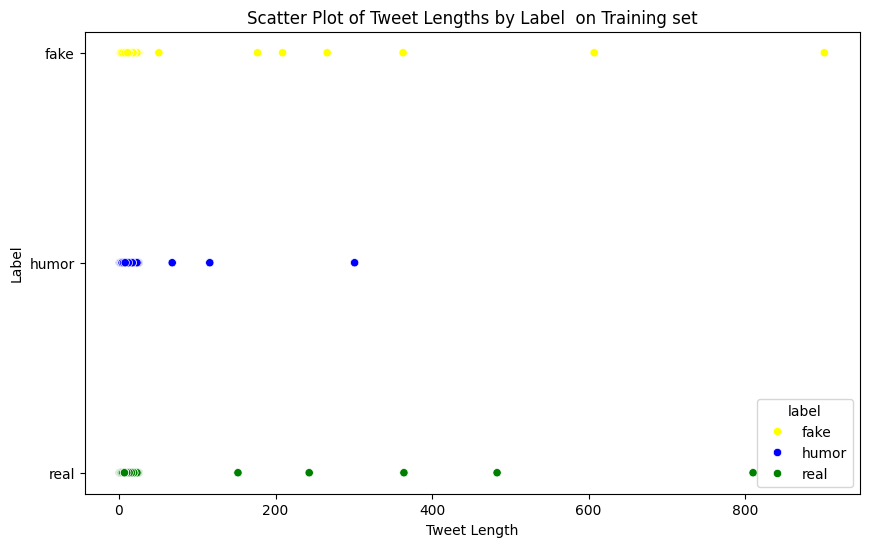

In [212]:
#Scatter Plot
plt.figure(figsize=(10, 6))
colors = {'fake': 'yellow', 'humor': 'blue', 'real': 'green'}
sns.scatterplot(x='tweet_length', y='label', hue='label', data=df_train, palette=colors)
plt.title('Scatter Plot of Tweet Lengths by Label  on Training set')
plt.xlabel('Tweet Length')
plt.ylabel('Label')

plt.show()

To check for Bias, we check the Class distribution in the training set.

In [213]:
#Class distribution
class_distribution = df_train['label'].value_counts()
print("Class distribution:")
print(class_distribution)

Class distribution:
label
fake     6742
real     4919
humor    2614
Name: count, dtype: int64


Language Mapping- Define the language codes to their corresponding details, and then map it to the respective records.

In [214]:
language_mapping = {
    "en": "English",
    "es": "Spanish",
    "fr": "French",
    "de": "German",
    "it": "Italian",
    "pt": "Portuguese",
    "nl": "Dutch",
    "ru": "Russian",
    "ar": "Arabic",
    "ja": "Japanese",
    "zh": "Chinese",
    "ko": "Korean",
    "hi": "Hindi",
    "tr": "Turkish",
    "sv": "Swedish",
    "fi": "Finnish",
    "no": "Norwegian",
    "da": "Danish",
    "pl": "Polish",
    "id": "Indonesian",
    "ms": "Malay",
    "th": "Thai",
    "he": "Hebrew",
    "el": "Greek",
    "hu": "Hungarian",
    "cs": "Czech",
    "sk": "Slovak",
    "ro": "Romanian",
    "bn": "Bengali",
    "ta": "Tamil",
    "te": "Telugu",
    "ml": "Malayalam",
    "gu": "Gujarati",
    "mr": "Marathi",
    "ur": "Urdu",
    "pa": "Punjabi",
    "si": "Sinhala",
    "ne": "Nepali",
    "af": "Afrikaans",
    "sq": "Albanian",
    "hy": "Armenian",
    "az": "Azerbaijani",
    "eu": "Basque",
    "be": "Belarusian",
    "bs": "Bosnian",
    "bg": "Bulgarian",
    "ca": "Catalan",
    "hr": "Croatian",
    "cy": "Welsh",
    "et": "Estonian",
    "fo": "Faroese",
    "ka": "Georgian",
    "gl": "Galician",
    "is": "Icelandic",
    "ga": "Irish",
    "jv": "Javanese",
    "kn": "Kannada",
    "kk": "Kazakh",
    "lv": "Latvian",
    "lt": "Lithuanian",
    "mk": "Macedonian",
    "mg": "Malagasy",
    "mt": "Maltese",
    "mi": "Maori",
    "mn": "Mongolian",
    "sr": "Serbian",
    "sl": "Slovenian",
    "sw": "Swahili",
    "tl": "Tagalog",
    "uz": "Uzbek",
    "vi": "Vietnamese",
    "xh": "Xhosa",
    "yi": "Yiddish",
    "zu": "Zulu",
}

In [215]:
def detect_and_language_mapping(tweet_text):
    lang, _ = langid.classify(tweet_text)
    return language_mapping.get(lang, lang)

df_train['language'] = df_train['tweetText'].apply(detect_and_language_mapping)
print(df_train[['tweetText', 'language', 'label']].head())

                                                                                                                                tweetText  \
0  ¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy. http://t.co/JQQeRPwN   
1   @milenagimon: Miren a Sandy en NY!  Tremenda imagen del huracán. Parece el "Día de la Independencia 2" http://t.co/41jUweux REAL! RT.   
2                    Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy  http://t.co/PTdAXABZ   
3                                                                                          Scary shit #hurricane #NY http://t.co/e4JLBUfH   
4                                               My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽 http://t.co/Ex61doZk   

  language label  
0  Spanish  fake  
1  Spanish  fake  
2  Spanish  fake  
3  English  fake  
4  English  fake  


In [216]:
#Display whole DataFrame 
print(df_train)

                  tweetId  \
0      263046056240115712   
1      262995061304852481   
2      262979898002534400   
3      262996108400271360   
4      263018881839411200   
...                   ...   
14272  443231991593304064   
14273  443086239127076865   
14274  442978105238753280   
14275  442753479782989824   
14276  442700377860104192   

                                                                                                                                    tweetText  \
0      ¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy. http://t.co/JQQeRPwN   
1       @milenagimon: Miren a Sandy en NY!  Tremenda imagen del huracán. Parece el "Día de la Independencia 2" http://t.co/41jUweux REAL! RT.   
2                        Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy  http://t.co/PTdAXABZ   
3                                                                      

Plotting a 3D scatter plot of Tweet Lengths and Languages by Label to understand the training set records better.

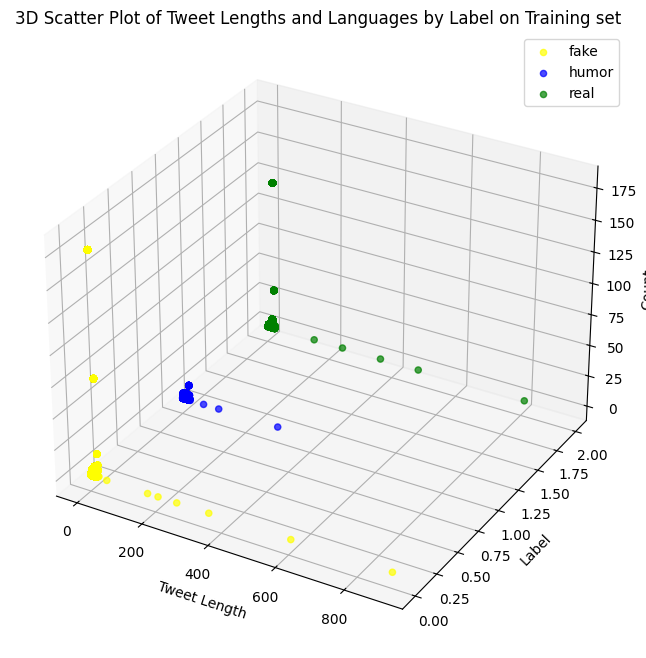

In [217]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for label, color in colors.items():
    label_data = df_train[df_train['label'] == label]
    tweet_lengths = label_data['tweet_length']
    tweet_languages = label_data['language']
    counts = label_data.groupby(['tweet_length', 'language']).size().reset_index(name='count')
    x = tweet_lengths.values
    y = np.full_like(x, fill_value=list(colors.keys()).index(label))
    z = []
    for length in x:
        lang_counts = counts[counts['tweet_length'] == length]
        if not lang_counts.empty:
            z.append(lang_counts.iloc[0]['count'])
        else:
            z.append(0)
    
    ax.scatter(x, y, z, c=color, marker='o', label=label, alpha=0.7)

ax.set_xlabel('Tweet Length')
ax.set_ylabel('Label')
ax.set_zlabel('Count')
ax.set_title('3D Scatter Plot of Tweet Lengths and Languages by Label on Training set')
ax.legend()
plt.show()

Now we separate the features and target variables in the dataset. And handle the missing values.

In [218]:
# Separate features and target variable for training set
X_train = df_train.drop('label', axis=1)  # Features
y_train = df_train['label']  # Target variable
# Preprocess- Handling missing values based on training set
X_train.fillna(value='unknown', inplace=True)
print(X_train.head())

              tweetId  \
0  263046056240115712   
1  262995061304852481   
2  262979898002534400   
3  262996108400271360   
4  263018881839411200   

                                                                                                                                tweetText  \
0  ¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy. http://t.co/JQQeRPwN   
1   @milenagimon: Miren a Sandy en NY!  Tremenda imagen del huracán. Parece el "Día de la Independencia 2" http://t.co/41jUweux REAL! RT.   
2                    Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy  http://t.co/PTdAXABZ   
3                                                                                          Scary shit #hurricane #NY http://t.co/e4JLBUfH   
4                                               My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽 http://t.co/Ex61doZk   

  

Preprocessing- Metadata removal(Removing Mentions, Hashtags, and Retweet) and Whitespace in the 'tweetText' column.

In [219]:
def preprocess_text(text):
    # Preprocess- Metadata removal
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Remove RT (Retweet)
    # Preprocess- Whitespace removal 
    text = text.strip()
    return text

X_train['tweetText'] = X_train['tweetText'].apply(preprocess_text)
print(X_train.head())

              tweetId  \
0  263046056240115712   
1  262995061304852481   
2  262979898002534400   
3  262996108400271360   
4  263018881839411200   

                                                                                                                               tweetText  \
0  ¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán Sandy. http://t.co/JQQeRPwN   
1              : Miren a Sandy en NY!  Tremenda imagen del huracán. Parece el "Día de la Independencia 2" http://t.co/41jUweux REAL! RT.   
2                     Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia ID4 Sandy  http://t.co/PTdAXABZ   
3                                                                                           Scary shit hurricane NY http://t.co/e4JLBUfH   
4                                                  My fave place in the world nyc hurricane sandy statueofliberty 🗽 http://t.co/Ex61doZk   

      us

Verify if all the records in the new preprocessed dataset is consistent and there are no missing values. If there are any, fill it with unknown.

In [220]:
df_train['language'].fillna(value='unknown', inplace=True)
print(df_train.head())

              tweetId  \
0  263046056240115712   
1  262995061304852481   
2  262979898002534400   
3  262996108400271360   
4  263018881839411200   

                                                                                                                                tweetText  \
0  ¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy. http://t.co/JQQeRPwN   
1   @milenagimon: Miren a Sandy en NY!  Tremenda imagen del huracán. Parece el "Día de la Independencia 2" http://t.co/41jUweux REAL! RT.   
2                    Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy  http://t.co/PTdAXABZ   
3                                                                                          Scary shit #hurricane #NY http://t.co/e4JLBUfH   
4                                               My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽 http://t.co/Ex61doZk   

  

## Machine Learning Algorithms Implementation

### Random Forest

#### Feature Selection
We choose features as tweetText, and language.
Then we compute the Feature importance, and other evaluation metrics like Accuracy, Error rate, Classification report and Confusion matrix for each on the training data.

In [221]:
# Select feature- tweetText
X = df_train['tweetText']
y = df_train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer_tweetText = TfidfVectorizer(max_features=5000)
X_train_vectorized_tweetText = tfidf_vectorizer_tweetText.fit_transform(X_train)
X_test_vectorized_tweetText = tfidf_vectorizer_tweetText.transform(X_test)

# Train the RandomForestClassifier
rf_classifier_tweetText = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_tweetText.fit(X_train_vectorized_tweetText, y_train)
y_pred_tweetText = rf_classifier_tweetText.predict(X_test_vectorized_tweetText)
accuracy_tweetText = accuracy_score(y_test, y_pred_tweetText)
error_rate_tweetText = 1 - accuracy_tweetText
feature_importance_df_tweetText = pd.DataFrame({'Feature': tfidf_vectorizer_tweetText.get_feature_names_out()})
feature_importance_df_tweetText['Importance'] = rf_classifier_tweetText.feature_importances_
feature_importance_df_tweetText = feature_importance_df_tweetText.sort_values(by='Importance', ascending=False)

print("Feature Importance DataFrame for 'tweetText' by Random Forest on Training set:")
print(feature_importance_df_tweetText)
print("Classification Report for 'tweetText' by Random Forest on Training set:")
print(classification_report(y_test, y_pred_tweetText))
print("Accuracy Score for 'tweetText' by Random Forest on Training set:", accuracy_tweetText)
print("Error rate for 'tweetText' by Random Forest on Training set:", error_rate_tweetText)
print("Confusion Matrix for 'tweetText' by Random Forest on Training set:")
conf_matrix_tweetText = confusion_matrix(y_test, y_pred_tweetText)
print(conf_matrix_tweetText)

Feature Importance DataFrame for 'tweetText' by Random Forest on Training set:
             Feature  Importance
3506           sandy    0.026644
1801            http    0.025708
669               co    0.025348
3649           shark    0.012650
1835       hurricane    0.011895
...              ...         ...
916    determinacion    0.000000
911       destroying    0.000000
2903       otherwise    0.000000
3529  sandya_real_06    0.000000
4568      whitehouse    0.000000

[5000 rows x 2 columns]
Classification Report for 'tweetText' by Random Forest on Training set:
              precision    recall  f1-score   support

        fake       0.72      0.91      0.80      1317
       humor       0.77      0.49      0.60       517
        real       0.92      0.77      0.84      1021

    accuracy                           0.78      2855
   macro avg       0.80      0.72      0.75      2855
weighted avg       0.80      0.78      0.78      2855

Accuracy Score for 'tweetText' by Random Forest

In [222]:
# Select feature- language
X = df_train['language']
y = df_train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer_language = TfidfVectorizer()
X_train_vectorized = tfidf_vectorizer_language.fit_transform(X_train)
rf_classifier_tweetlang = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_tweetlang.fit(X_train_vectorized, y_train)
feature_importances = rf_classifier_tweetlang.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': tfidf_vectorizer_language.get_feature_names_out()})
feature_importance_df['Importance'] = feature_importances[:len(feature_importance_df)]
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance DataFrame for 'language' by Random Forest on Training set:")
print(feature_importance_df)

X_test_vectorized = tfidf_vectorizer_language.transform(X_test)
y_pred = rf_classifier_tweetlang.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
error_rate= 1 - accuracy
print("Classification Report for 'language' by Random Forest on Training set:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score for 'language' by Random Forest on Training set:", accuracy)
print("\nError rate for 'language' by Random Forest on Training set:", error_rate)
print("\nConfusion Matrix for 'language' by Random Forest on Training set:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix) 

Feature Importance DataFrame for 'language' by Random Forest on Training set:
        Feature  Importance
17      english    0.139425
44        malay    0.115642
64      spanish    0.065352
22       french    0.060498
53   portuguese    0.048879
..          ...         ...
27           ht    0.002545
46      marathi    0.001713
7    belarusian    0.001448
5   azerbaijani    0.001248
61      sinhala    0.001196

[76 rows x 2 columns]
Classification Report for 'language' by Random Forest on Training set:
              precision    recall  f1-score   support

        fake       0.47      0.96      0.63      1317
       humor       0.52      0.03      0.05       517
        real       0.40      0.05      0.09      1021

    accuracy                           0.47      2855
   macro avg       0.46      0.35      0.26      2855
weighted avg       0.45      0.47      0.33      2855


Accuracy Score for 'language' by Random Forest on Training set: 0.4669001751313485

Error rate for 'language' 

#### Dimesionality Reduction
Apply dimensionality reduction using PCA, and then generate scatter plots for the three features.

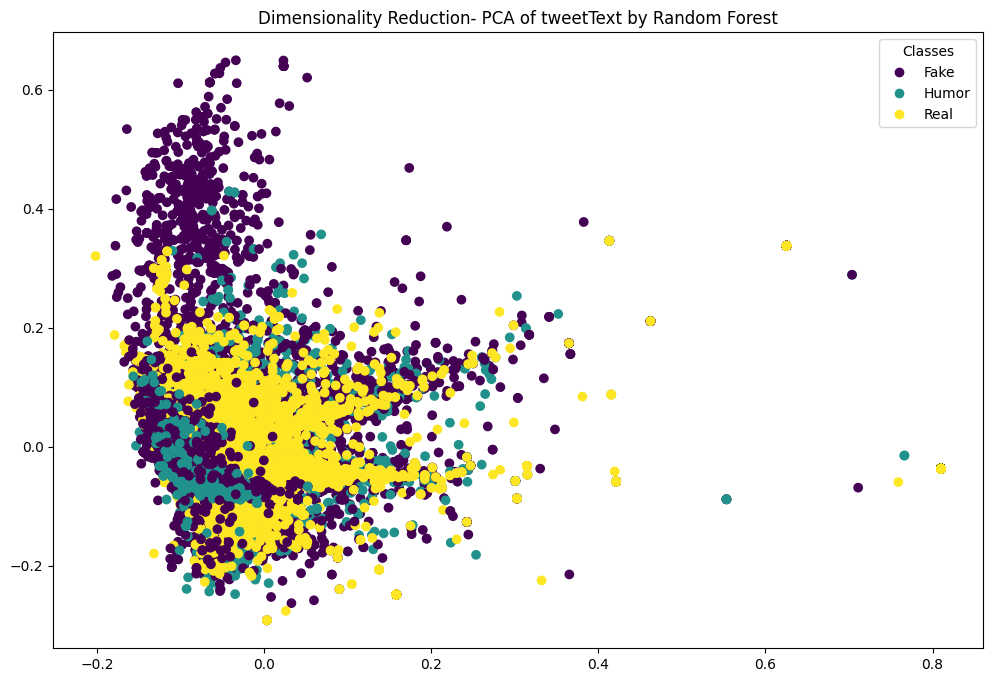

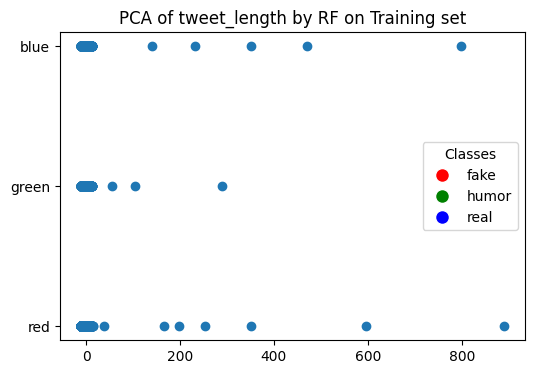

In [223]:
X_text = df_train['tweetText']
X_numeric = df_train[['tweet_length']]
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_text_tfidf = tfidf_vectorizer.fit_transform(X_text)
pca_text = PCA(n_components=2)
X_text_pca = pca_text.fit_transform(X_text_tfidf.toarray())
# PCA to 'tweet_length'
pca_numeric = PCA(n_components=1)
X_numeric_pca = pca_numeric.fit_transform(X_numeric)
# Scatter plot- 'tweetText'
plt.figure(figsize=(12, 8))
scatter_text = plt.scatter(X_text_pca[:, 0], X_text_pca[:, 1], c=df_train['label'].map({'fake': 0, 'humor': 1, 'real': 2}), cmap='viridis')
plt.title('Dimensionality Reduction- PCA of tweetText by Random Forest')
plt.legend(handles=scatter_text.legend_elements()[0], title='Classes', labels=['Fake', 'Humor', 'Real'])
plt.show()
# Scatter plot- 'tweet_length'
plt.figure(figsize=(6, 4))
colors = {'fake': 'red', 'humor': 'green', 'real': 'blue'}
scatter_numeric = plt.scatter(X_numeric_pca, df_train['label'].map(colors))
legend_handles_numeric = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors.values()]
plt.legend(legend_handles_numeric, colors.keys(), title='Classes')
plt.title('PCA of tweet_length by RF on Training set')
plt.show()

#### Evaluation
Now, we will generate the graphs and compare the results.
* ROC curve
* Confusion matrix
* Feature importance bar graph

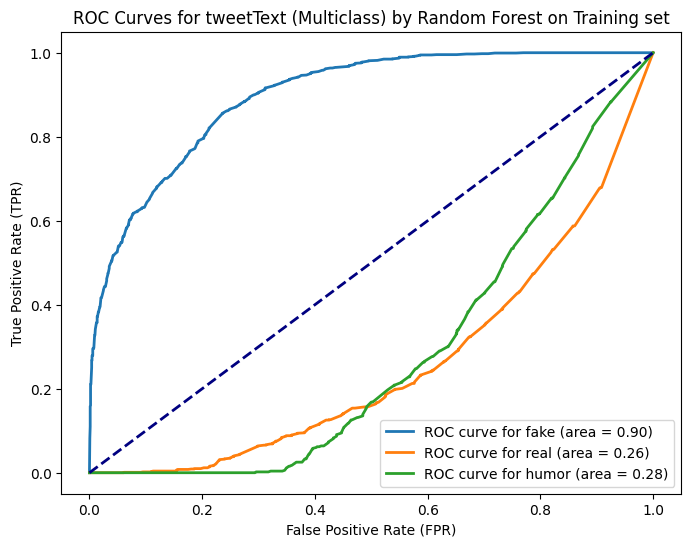

In [224]:
#ROC curve
labels = ['fake', 'real', 'humor']
y_pred_prob_tweetText = rf_classifier_tweetText.predict_proba(X_test_vectorized_tweetText)
fpr = dict()
tpr = dict()
for i, label in enumerate(labels):
    fpr[label], tpr[label], _ = roc_curve((y_test == label).astype(int), y_pred_prob_tweetText[:, i])
plt.figure(figsize=(8, 6))
for label in labels:
    roc_auc = auc(fpr[label], tpr[label])
    plt.plot(fpr[label], tpr[label], lw=2, label=f'ROC curve for {label} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for tweetText (Multiclass) by Random Forest on Training set')
plt.legend(loc="lower right")
plt.show()

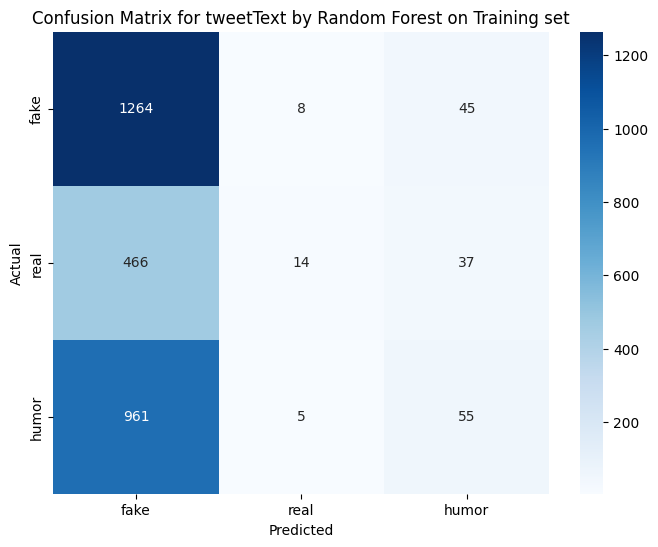

In [225]:
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for tweetText by Random Forest on Training set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

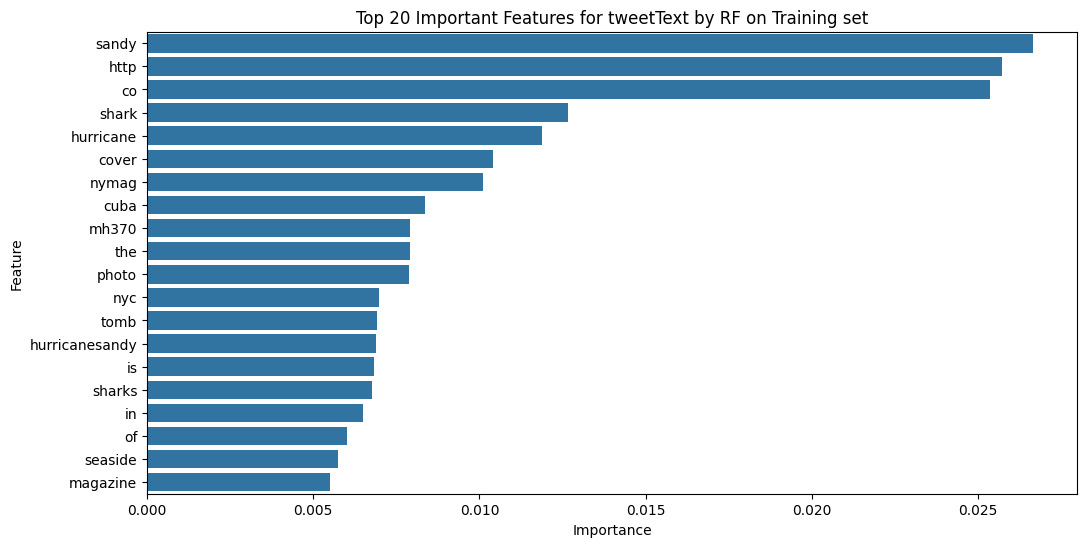

In [226]:
# Feature Importance Bar chart
feature_importance_df_tweetText = pd.DataFrame({'Feature': tfidf_vectorizer_tweetText.get_feature_names_out()})
feature_importance_df_tweetText['Importance'] = rf_classifier_tweetText.feature_importances_
feature_importance_df_tweetText = feature_importance_df_tweetText.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_tweetText.head(20))
plt.title('Top 20 Important Features for tweetText by RF on Training set')
plt.show()

Find the Explained Variation Ratio.

In [227]:
pca_text = PCA(n_components=2)
X_text_pca = pca_text.fit_transform(X_text_tfidf.toarray())
explained_variance_ratio_text = pca_text.explained_variance_ratio_
print("Explained Variance Ratio for PCA on tweetText by Random Forest on Training set:")
print(explained_variance_ratio_text)

Explained Variance Ratio for PCA on tweetText by Random Forest on Training set:
[0.02390476 0.014549  ]


### Support Vector Machine

#### Feature Selection
We choose features as tweetText, and language.
Then we compute the Feature importance, and other evaluation metrics like Accuracy, Error rate, Classification report and Confusion matrix for each on the Training set.

In [228]:
# Combine 'tweetText' and 'language' into a single feature for selection
X = df_train['tweetText'] + ' ' + df_train['language']
y = df_train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer_svm = TfidfVectorizer(max_features=5000)
X_train_vectorized = tfidf_vectorizer_svm.fit_transform(X_train)
X_test_vectorized = tfidf_vectorizer_svm.transform(X_test)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_vectorized, y_train)

y_pred = svm_classifier.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print("\nClassification Report by Support Vector Machine on Training set:")
print(classification_report(y_test, y_pred))
print("Accuracy Score by Support Vector Machine on Training set:", accuracy)
print("Error rate by Support Vector Machine on Training set:", error_rate)
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix by Support Vector Machine on Training set:")
print(conf_matrix_svm)


Classification Report by Support Vector Machine on Training set:
              precision    recall  f1-score   support

        fake       0.75      0.90      0.82      1317
       humor       0.74      0.59      0.65       517
        real       0.93      0.79      0.86      1021

    accuracy                           0.80      2855
   macro avg       0.81      0.76      0.78      2855
weighted avg       0.81      0.80      0.80      2855

Accuracy Score by Support Vector Machine on Training set: 0.8035026269702277
Error rate by Support Vector Machine on Training set: 0.19649737302977233

Confusion Matrix by Support Vector Machine on Training set:
[[1180   90   47]
 [ 198  303   16]
 [ 192   18  811]]


#### Dimesionality Reduction
Apply dimensionality reduction using PCA, and then generate scatter plots for the features on Training data.

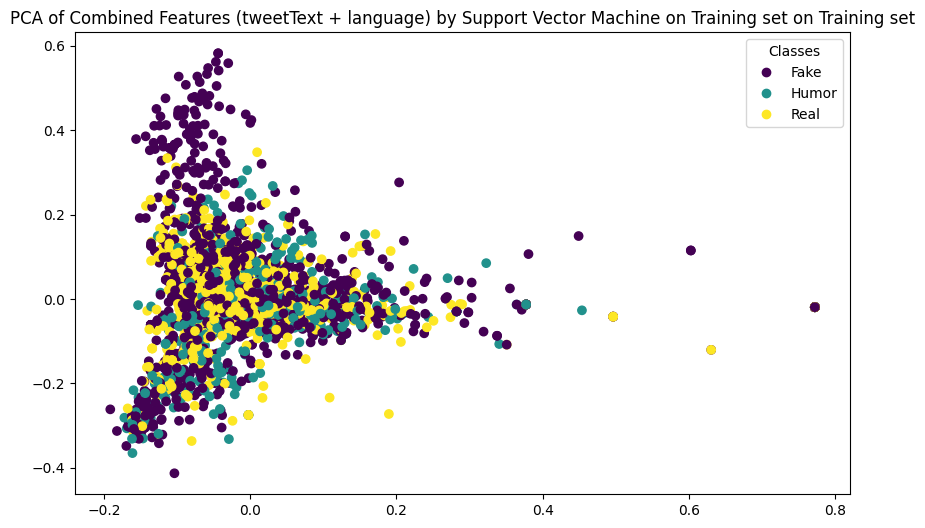

In [229]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_vectorized.toarray())
# Scatter plot of PCA 
plt.figure(figsize=(10, 6))
scatter_pca = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test.map({'fake': 0, 'humor': 1, 'real': 2}), cmap='viridis')
plt.title('PCA of Combined Features (tweetText + language) by Support Vector Machine on Training set on Training set')
plt.legend(handles=scatter_pca.legend_elements()[0], title='Classes', labels=['Fake', 'Humor', 'Real'])
plt.show()

#### Evaluation
Now, we will generate the graphs and compare the results on the Training data.
* ROC curve
* Confusion matrix
* Feature importance bar graph- Not applicable for this algorithm, SVM.

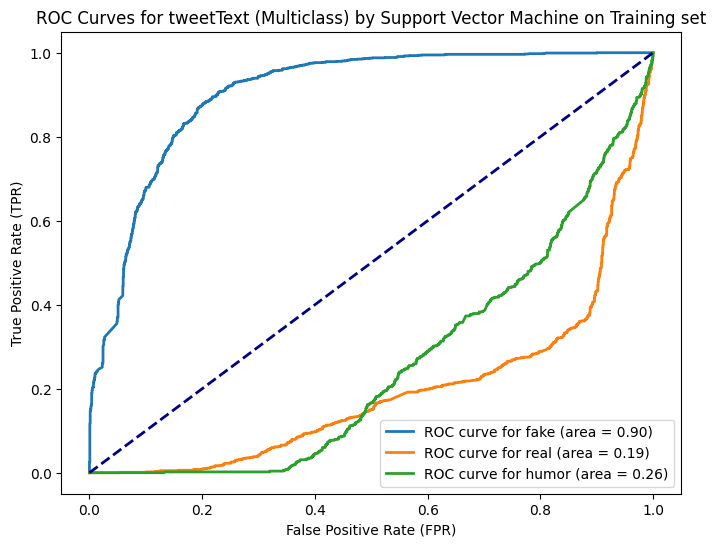

In [230]:
# Select feature- tweetText
X_svm = df_train['tweetText']
y_svm = df_train['label']
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)
tfidf_vectorizer_svm = TfidfVectorizer(max_features=5000)
X_train_vectorized_svm = tfidf_vectorizer_svm.fit_transform(X_train_svm)
X_test_vectorized_svm = tfidf_vectorizer_svm.transform(X_test_svm)
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train_vectorized_svm, y_train_svm)
y_pred_svm = svm_classifier.predict(X_test_vectorized_svm)

# ROC curve
labels_svm = ['fake', 'real', 'humor']
y_pred_prob_svm = svm_classifier.predict_proba(X_test_vectorized_svm)
fpr_svm = dict()
tpr_svm = dict()
plt.figure(figsize=(8, 6))
for i, label in enumerate(labels_svm):
    fpr_svm[label], tpr_svm[label], _ = roc_curve((y_test_svm == label).astype(int), y_pred_prob_svm[:, i])
    roc_auc_svm = auc(fpr_svm[label], tpr_svm[label])
    plt.plot(fpr_svm[label], tpr_svm[label], lw=2, label=f'ROC curve for {label} (area = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for tweetText (Multiclass) by Support Vector Machine on Training set')
plt.legend(loc="lower right")
plt.show()

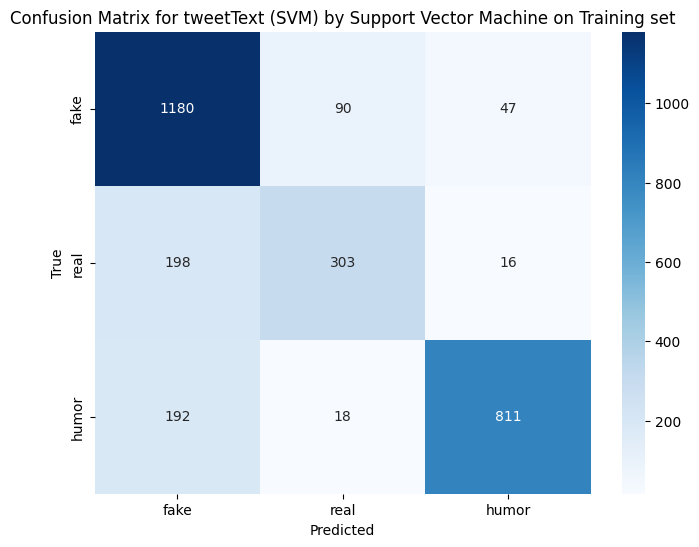

In [231]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=labels_svm, yticklabels=labels_svm)
plt.title('Confusion Matrix for tweetText (SVM) by Support Vector Machine on Training set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Gradient Boosting

#### Feature Selection
We choose features as tweetText, and language.
Then we compute the Feature importance, and other evaluation metrics like Accuracy, Error rate, Classification report and Confusion matrix for both on Training set.

In [232]:
# Select feature- tweetText
X_gb = df_train['tweetText']
y_gb = df_train['label']
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_gb, y_gb, test_size=0.2, random_state=42)

tfidf_vectorizer_gb = TfidfVectorizer(max_features=5000)
X_train_vectorized_gb = tfidf_vectorizer_gb.fit_transform(X_train_gb)
X_test_vectorized_gb = tfidf_vectorizer_gb.transform(X_test_gb)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train_vectorized_gb, y_train_gb)
y_pred_gb = gb_classifier.predict(X_test_vectorized_gb)

feature_importances_gb = gb_classifier.feature_importances_
feature_importance_df_gb = pd.DataFrame({'Feature': tfidf_vectorizer_gb.get_feature_names_out()})
feature_importance_df_gb['Importance'] = feature_importances_gb
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)

print("Feature Importance DataFrame for 'tweetText' by Gradient Boosting on Training set:")
print(feature_importance_df_gb)
print("\nClassification Report by Gradient Boosting on Training set:")
print(classification_report(y_test, y_pred_gb))
accuracy_gb = accuracy_score(y_test, y_pred_gb)
error_rate_gb = 1 - accuracy_gb
print("Accuracy Score by Gradient Boosting on Training set:", accuracy_gb)
print("Error rate by Gradient Boosting on Training set:", error_rate_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix by Gradient Boosting on Training set:")
print(conf_matrix_gb)

Feature Importance DataFrame for 'tweetText' by Gradient Boosting on Training set:
            Feature  Importance
732           cover    0.074131
4175           tomb    0.065193
3649          shark    0.063751
773            cuba    0.039746
3506          sandy    0.039300
...             ...         ...
1733           hell    0.000000
1732     helicopter    0.000000
1731  helenasbd_413    0.000000
1730        heights    0.000000
4999           허리케인    0.000000

[5000 rows x 2 columns]

Classification Report by Gradient Boosting on Training set:
              precision    recall  f1-score   support

        fake       0.64      0.92      0.75      1317
       humor       0.71      0.34      0.46       517
        real       0.91      0.64      0.75      1021

    accuracy                           0.71      2855
   macro avg       0.75      0.63      0.66      2855
weighted avg       0.75      0.71      0.70      2855

Accuracy Score by Gradient Boosting on Training set: 0.71383537653

#### Dimesionality Reduction
Apply dimensionality reduction using PCA, and then generate scatter plots for the three features on Training set.

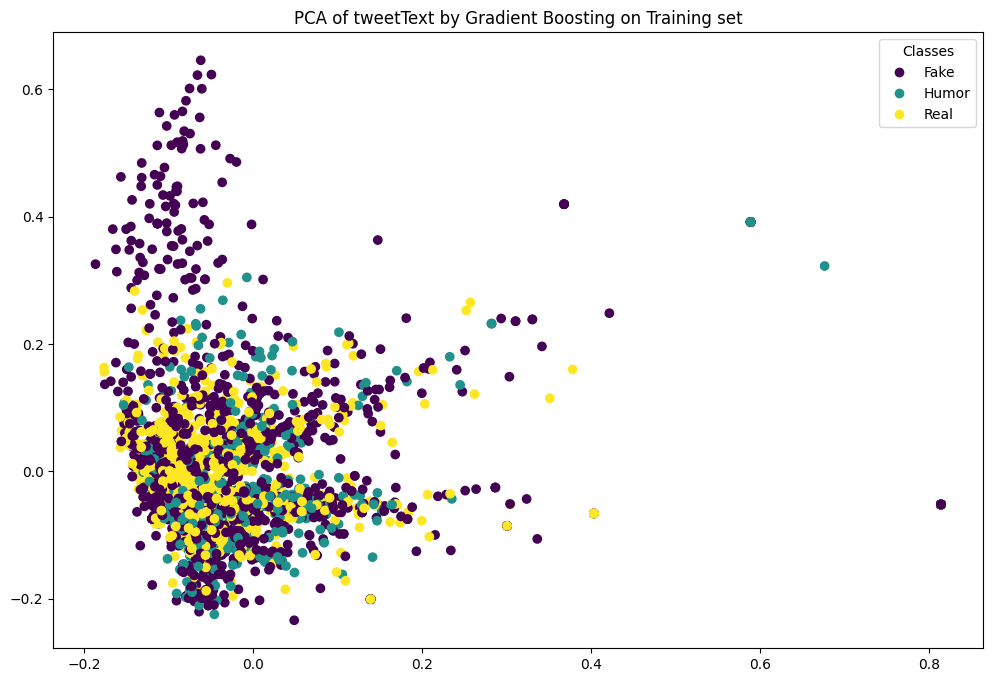

In [233]:
# Scatter plot- 'tweetText' for Gradient Boosting
pca_gb = PCA(n_components=2)
X_text_pca_gb = pca_gb.fit_transform(X_test_vectorized_gb.toarray())
plt.figure(figsize=(12, 8))
scatter_text_gb = plt.scatter(X_text_pca_gb[:, 0], X_text_pca_gb[:, 1], c=y_test_gb.map({'fake': 0, 'humor': 1, 'real': 2}), cmap='viridis')
plt.title('PCA of tweetText by Gradient Boosting on Training set')
plt.legend(handles=scatter_text_gb.legend_elements()[0], title='Classes', labels=['Fake', 'Humor', 'Real'])
plt.show()

#### Evaluation
Now, we will generate the graphs and compare the results on the training set.
* ROC curve
* Confusion matrix
* Feature importance bar graph- Not applicable for Gradient Boosting.

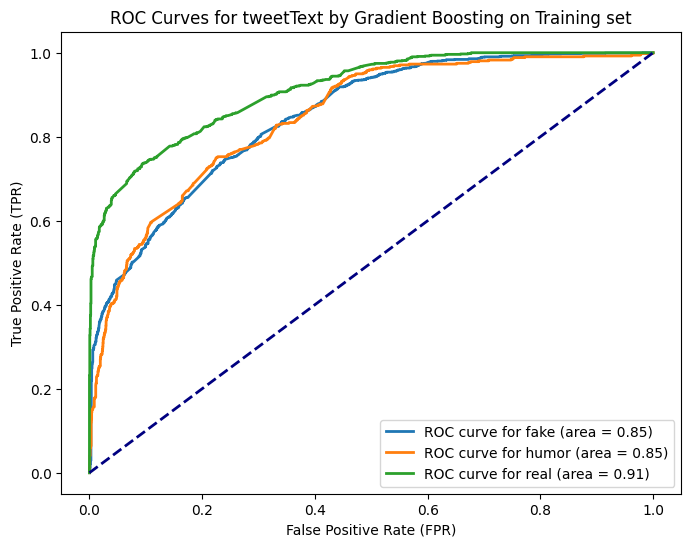

In [234]:
#ROC curve
y_pred_prob_gb = gb_classifier.predict_proba(X_test_vectorized_gb)
fpr_gb = dict()
tpr_gb = dict()
roc_auc_gb = dict()

for i, label in enumerate(gb_classifier.classes_):
    y_true_label = (y_test_gb == label).astype(int)
    fpr_gb[label], tpr_gb[label], _ = roc_curve(y_true_label, y_pred_prob_gb[:, i])
    roc_auc_gb[label] = auc(fpr_gb[label], tpr_gb[label])

plt.figure(figsize=(8, 6))
for label in gb_classifier.classes_:
    plt.plot(fpr_gb[label], tpr_gb[label], lw=2, label=f'ROC curve for {label} (area = {roc_auc_gb[label]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for tweetText by Gradient Boosting on Training set')
plt.legend(loc="lower right")
plt.show()

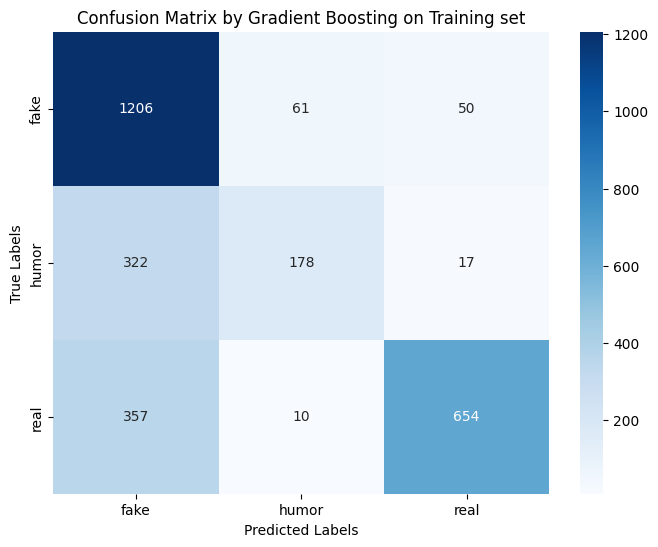

In [235]:
# Confusion Matrix Heatmap
conf_matrix_gb = confusion_matrix(y_test_gb, gb_classifier.predict(X_test_vectorized_gb))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=gb_classifier.classes_, yticklabels=gb_classifier.classes_)
plt.title('Confusion Matrix by Gradient Boosting on Training set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Testing the model on the dataset
## Importing the Test dataset

We specify the filepath and import the CSV file as out test dataset with the help of Pandas Dataframe(df).
Here 'sep=\t' is delimiter used to separate values in a file, suggesting that the filepath is separated by tab spaces

In [236]:
train_file_path = r'C:\Users\DELL\mltdataset\mediaeval-2015-testset.txt'
df_test = pd.read_csv(train_file_path, sep='\t')
df_test.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS.... http://t.co/je2hcFpVfN,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse from ISS.... http://t.co/oqwtTL0ThS,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake
2,578891261353984000,“@Shyman33: Eclipse from ISS.... http://t.co/C0VfboScRj” 우주에서본 3.20 일식 Wow! amazing!,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake
3,578846612312748032,Eclipse from ISS.... http://t.co/En87OtvsU6,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chose... http://t.co/yNBN7c4O51\n\nLa création divine n'a pas de limite 😍,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake


## Data Analaysis and Preprocessing

We check the number of rows and columns in the Test data, then we remove duplicates, check for missing data in the dataset, Remove Metadata, whitespaces and then map the language and tweet length of each tweet to the corresponding record.

In [237]:
num_rows_test = df_test.shape[0]
num_columns_test = df_test.shape[1]
print("Number of rows:", num_rows_test)
print("Number of columns:", num_columns_test)

Number of rows: 3755
Number of columns: 7


In [238]:
# Remove duplicates
df_test = df_test.drop_duplicates()
# Check for missing data
missing_data = df_test.isnull().sum() #each column
print("Missing data in each column:")
print(missing_data)
any_missing_data = df_test.isnull().any().any() # Entire DF
print("\nIs there any missing data in the DataFrame?", any_missing_data)
print("\nAfter preprocessing the test set:")
print(df_test.head())

Missing data in each column:
tweetId       0
tweetText     0
userId        0
imageId(s)    0
username      0
timestamp     0
label         0
dtype: int64

Is there any missing data in the DataFrame? False

After preprocessing the test set:
              tweetId  \
0  578854927457349632   
1  578874632670953472   
2  578891261353984000   
3  578846612312748032   
4  578975333841551360   

                                                                                                             tweetText  \
0                                                    kereeen RT @Shyman33: Eclipse from ISS.... http://t.co/je2hcFpVfN   
1                                      Absolutely beautiful! RT @Shyman33: Eclipse from ISS.... http://t.co/oqwtTL0ThS   
2                                 “@Shyman33: Eclipse from ISS.... http://t.co/C0VfboScRj” 우주에서본 3.20 일식 Wow! amazing!   
3                                                                          Eclipse from ISS.... http://t.co/En87OtvsU6   

Based on size, we find the length of the 'tweetText' column to observe the pattern in the test data.

In [239]:
def get_length_of_tweet(tweet_text):
    return len(tweet_text.split())

df_test['tweet_length'] = df_test['tweetText'].apply(get_length_of_tweet)
print(df_test.head())

              tweetId  \
0  578854927457349632   
1  578874632670953472   
2  578891261353984000   
3  578846612312748032   
4  578975333841551360   

                                                                                                             tweetText  \
0                                                    kereeen RT @Shyman33: Eclipse from ISS.... http://t.co/je2hcFpVfN   
1                                      Absolutely beautiful! RT @Shyman33: Eclipse from ISS.... http://t.co/oqwtTL0ThS   
2                                 “@Shyman33: Eclipse from ISS.... http://t.co/C0VfboScRj” 우주에서본 3.20 일식 Wow! amazing!   
3                                                                          Eclipse from ISS.... http://t.co/En87OtvsU6   
4  @ebonfigli: Éclipse vue de l'ISS... Autre chose... http://t.co/yNBN7c4O51\n\nLa création divine n'a pas de limite 😍   

       userId   imageId(s)         username                       timestamp  \
0    70824972  eclipse_01            

Now creating a scatter plot to observe the patterns between TweetLength and Label column in the test dataset.

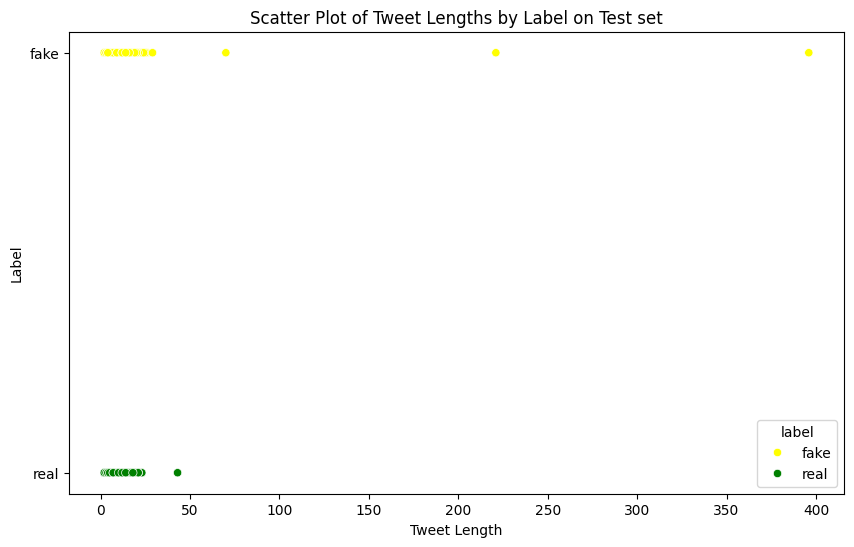

In [240]:
#Scatter Plot
plt.figure(figsize=(10, 6))
colors = {'fake': 'yellow', 'humor': 'blue', 'real': 'green'}

sns.scatterplot(x='tweet_length', y='label', hue='label', data=df_test, palette=colors)
plt.title('Scatter Plot of Tweet Lengths by Label on Test set')
plt.xlabel('Tweet Length')
plt.ylabel('Label')

plt.show()

In [241]:
def detect_and_language_mapping(tweet_text):
    lang, _ = langid.classify(tweet_text)
    return language_mapping.get(lang, lang)

df_test['language'] = df_test['tweetText'].apply(detect_and_language_mapping)
print(df_test[['tweetText', 'language', 'label']].head())

                                                                                                             tweetText  \
0                                                    kereeen RT @Shyman33: Eclipse from ISS.... http://t.co/je2hcFpVfN   
1                                      Absolutely beautiful! RT @Shyman33: Eclipse from ISS.... http://t.co/oqwtTL0ThS   
2                                 “@Shyman33: Eclipse from ISS.... http://t.co/C0VfboScRj” 우주에서본 3.20 일식 Wow! amazing!   
3                                                                          Eclipse from ISS.... http://t.co/En87OtvsU6   
4  @ebonfigli: Éclipse vue de l'ISS... Autre chose... http://t.co/yNBN7c4O51\n\nLa création divine n'a pas de limite 😍   

  language label  
0  English  fake  
1  English  fake  
2   Korean  fake  
3  English  fake  
4   French  fake  


Plotting a 3D scatter plot of Tweet Lengths and Languages by Label to understand the test set records better.

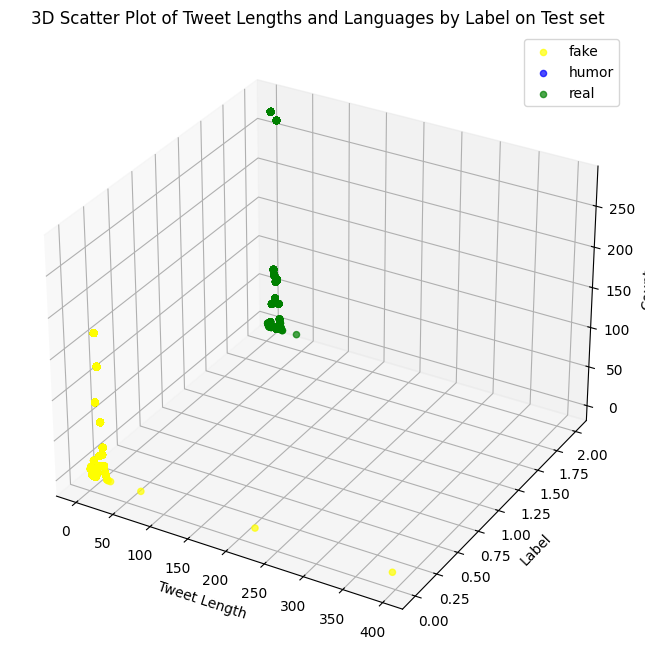

In [242]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for label, color in colors.items():
    label_data = df_test[df_test['label'] == label]
    tweet_lengths = label_data['tweet_length']
    tweet_languages = label_data['language']
    counts = label_data.groupby(['tweet_length', 'language']).size().reset_index(name='count')
    x = tweet_lengths.values
    y = np.full_like(x, fill_value=list(colors.keys()).index(label))
    z = []
    for length in x:
        lang_counts = counts[counts['tweet_length'] == length]
        if not lang_counts.empty:
            z.append(lang_counts.iloc[0]['count'])
        else:
            z.append(0)
    
    ax.scatter(x, y, z, c=color, marker='o', label=label, alpha=0.7)

ax.set_xlabel('Tweet Length')
ax.set_ylabel('Label')
ax.set_zlabel('Count')
ax.set_title('3D Scatter Plot of Tweet Lengths and Languages by Label on Test set')
ax.legend()
plt.show()

To check for Bias, we check the Class distribution.

In [243]:
#Class distribution
class_distribution = df_test['label'].value_counts()
print("Class distribution:")
print(class_distribution)

Class distribution:
label
fake    2546
real    1209
Name: count, dtype: int64


Language Mapping- Define the language codes to their corresponding details, and then map it to the respective records.

In [244]:
# Separate features and target variable for test set
X_test = df_test.drop('label', axis=1)  # Features
y_test = df_test['label']  # Target variable
def preprocess_text(text):
    # Preprocess- Metadata removal
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Remove RT (Retweet)
    # Preprocess- Whitespace removal 
    text = text.strip()
    return text
    
# Preprocess- Handling missing values based on test set
X_test.fillna(value='unknown', inplace=True)
X_test['tweetText'] = X_test['tweetText'].apply(preprocess_text)
print(X_test.head())

              tweetId  \
0  578854927457349632   
1  578874632670953472   
2  578891261353984000   
3  578846612312748032   
4  578975333841551360   

                                                                                                   tweetText  \
0                                                      kereeen : Eclipse from ISS.... http://t.co/je2hcFpVfN   
1                                        Absolutely beautiful! : Eclipse from ISS.... http://t.co/oqwtTL0ThS   
2                                “: Eclipse from ISS.... http://t.co/C0VfboScRj” 우주에서본 3.20 일식 Wow! amazing!   
3                                                                Eclipse from ISS.... http://t.co/En87OtvsU6   
4  : Éclipse vue de l'ISS... Autre chose... http://t.co/yNBN7c4O51\n\nLa création divine n'a pas de limite 😍   

       userId   imageId(s)         username                       timestamp  \
0    70824972  eclipse_01            peay_s  Fri Mar 20 09:45:43 +0000 2015   
1   344707006  ecl

In [245]:
df_test['language'].fillna(value='unknown', inplace=True)
print(df_test.head())

              tweetId  \
0  578854927457349632   
1  578874632670953472   
2  578891261353984000   
3  578846612312748032   
4  578975333841551360   

                                                                                                             tweetText  \
0                                                    kereeen RT @Shyman33: Eclipse from ISS.... http://t.co/je2hcFpVfN   
1                                      Absolutely beautiful! RT @Shyman33: Eclipse from ISS.... http://t.co/oqwtTL0ThS   
2                                 “@Shyman33: Eclipse from ISS.... http://t.co/C0VfboScRj” 우주에서본 3.20 일식 Wow! amazing!   
3                                                                          Eclipse from ISS.... http://t.co/En87OtvsU6   
4  @ebonfigli: Éclipse vue de l'ISS... Autre chose... http://t.co/yNBN7c4O51\n\nLa création divine n'a pas de limite 😍   

       userId   imageId(s)         username                       timestamp  \
0    70824972  eclipse_01            

## Applying the Machine Learning Algorithms on the Test set

### Random Forest

#### Feature Selection
We choose features as tweetText, and language.
Then we compute the Feature importance, and other evaluation metrics like Accuracy, Error rate, Classification report and Confusion matrix for each on the test data.

In [246]:
# Select feature- tweetText
X = df_test['tweetText']
y = df_test['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer_tweetText = TfidfVectorizer(max_features=5000)
X_train_vectorized_tweetText = tfidf_vectorizer_tweetText.fit_transform(X_train)
X_test_vectorized_tweetText = tfidf_vectorizer_tweetText.transform(X_test)
rf_classifier_tweetText = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_tweetText.fit(X_train_vectorized_tweetText, y_train)
y_pred_tweetText = rf_classifier_tweetText.predict(X_test_vectorized_tweetText)
accuracy_tweetText = accuracy_score(y_test, y_pred_tweetText)
error_rate_tweetText = 1 - accuracy_tweetText
feature_importance_df_tweetText = pd.DataFrame({'Feature': tfidf_vectorizer_tweetText.get_feature_names_out()})
feature_importance_df_tweetText['Importance'] = rf_classifier_tweetText.feature_importances_
feature_importance_df_tweetText = feature_importance_df_tweetText.sort_values(by='Importance', ascending=False)

print("Feature Importance DataFrame for 'tweetText' by Random Forest on Test set:")
print(feature_importance_df_tweetText)
print("Classification Report for 'tweetText' by Random Forest on Test set:")
print(classification_report(y_test, y_pred_tweetText))
print("Accuracy Score for 'tweetText' by Random Forest on Test set:", accuracy_tweetText)
print("Error rate for 'tweetText' by Random Forest:", error_rate_tweetText)
print("Confusion Matrix for 'tweetText' by Random Forest on Test set:")
conf_matrix_tweetText = confusion_matrix(y_test, y_pred_tweetText)
print(conf_matrix_tweetText)

Feature Importance DataFrame for 'tweetText' by Random Forest on Test set:
         Feature  Importance
1728    historic    0.087934
1198  earthquake    0.063921
2103       nepal    0.058491
972    collapses    0.045598
1694        hero    0.043884
...          ...         ...
2862  sjhltgxd8m    0.000000
2863  sjushm8lzi    0.000000
517   6zamdb0dqg    0.000000
515   6yj0zwk8dh    0.000000
2500  rejkvz62ew    0.000000

[5000 rows x 2 columns]
Classification Report for 'tweetText' by Random Forest on Test set:
              precision    recall  f1-score   support

        fake       0.94      0.98      0.96       503
        real       0.96      0.88      0.92       248

    accuracy                           0.95       751
   macro avg       0.95      0.93      0.94       751
weighted avg       0.95      0.95      0.95       751

Accuracy Score for 'tweetText' by Random Forest on Test set: 0.9494007989347537
Error rate for 'tweetText' by Random Forest: 0.05059920106524629
Confusion Ma

In [247]:
# Select feature- language
X = df_test['language']
y = df_test['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer_language = TfidfVectorizer()
X_train_vectorized = tfidf_vectorizer_language.fit_transform(X_train)
rf_classifier_tweetlang = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_tweetlang.fit(X_train_vectorized, y_train)
feature_importances = rf_classifier_tweetlang.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': tfidf_vectorizer_language.get_feature_names_out()})
feature_importance_df['Importance'] = feature_importances[:len(feature_importance_df)]
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance DataFrame for 'language' by Random Forest on Test set:")
print(feature_importance_df)

X_test_vectorized = tfidf_vectorizer_language.transform(X_test)
y_pred = rf_classifier_tweetlang.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
error_rate= 1 - accuracy
print("Classification Report for 'language' by Random Forest on Test set:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score for 'language' by Random Forest on Test set:", accuracy)
print("\nError rate for 'language' by Random Forest on Test set:", error_rate)
print("\nConfusion Matrix for 'language' by Random Forest on Test set:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix) 

Feature Importance DataFrame for 'language' by Random Forest on Test set:
        Feature  Importance
7       english    0.448372
1        arabic    0.269684
40         urdu    0.119075
24           la    0.027248
35      spanish    0.016129
14       german    0.013218
27        malay    0.012405
12       french    0.011603
31           ps    0.007857
28           nn    0.007275
6         dutch    0.005809
4            br    0.004413
0            an    0.004403
36       telugu    0.004278
19      italian    0.004018
9      estonian    0.003954
13     galician    0.003684
23           ky    0.003595
37         thai    0.003550
17        hindi    0.003507
30   portuguese    0.003434
20     japanese    0.002697
38      turkish    0.002448
33      russian    0.002392
16       hebrew    0.002229
21       korean    0.001859
5       chinese    0.001649
11      finnish    0.001554
10           fa    0.001484
8            eo    0.001266
32           qu    0.001035
15        greek    0.000898
18

#### Dimesionality Reduction
Apply dimensionality reduction using PCA on the test set, and then generate scatter plots for the three features on Test set.

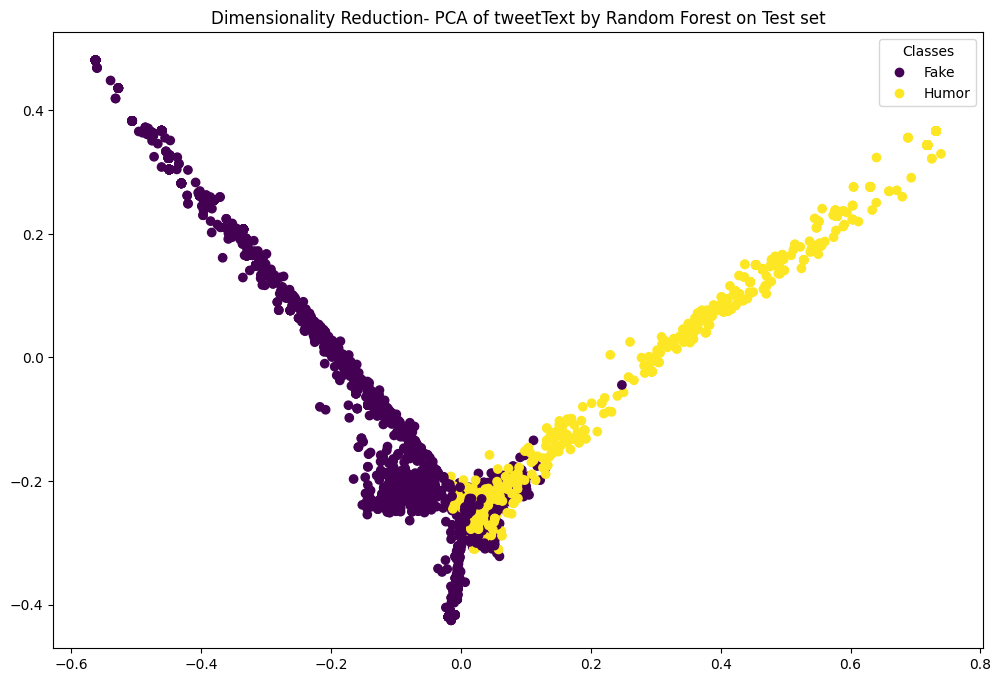

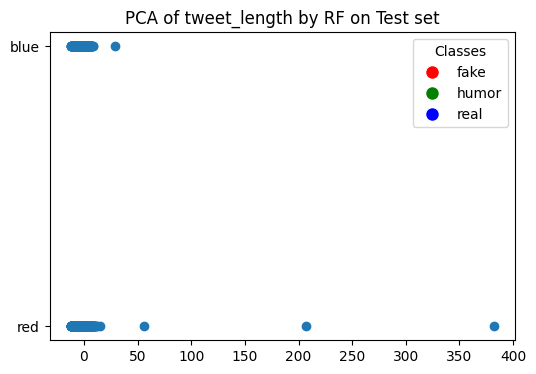

In [248]:
X_text = df_test['tweetText']
X_numeric = df_test[['tweet_length']]
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_text_tfidf = tfidf_vectorizer.fit_transform(X_text)
pca_text = PCA(n_components=2)
X_text_pca = pca_text.fit_transform(X_text_tfidf.toarray())
# PCA to 'tweet_length'
pca_numeric = PCA(n_components=1)
X_numeric_pca = pca_numeric.fit_transform(X_numeric)

# Scatter plot- 'tweetText'
plt.figure(figsize=(12, 8))
scatter_text = plt.scatter(X_text_pca[:, 0], X_text_pca[:, 1], c=df_test['label'].map({'fake': 0, 'humor': 1, 'real': 2}), cmap='viridis')
plt.title('Dimensionality Reduction- PCA of tweetText by Random Forest on Test set')
plt.legend(handles=scatter_text.legend_elements()[0], title='Classes', labels=['Fake', 'Humor', 'Real'])
plt.show()

# Scatter plot- 'tweet_length'
plt.figure(figsize=(6, 4))
colors = {'fake': 'red', 'humor': 'green', 'real': 'blue'}
scatter_numeric = plt.scatter(X_numeric_pca, df_test['label'].map(colors))
legend_handles_numeric = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors.values()]
plt.legend(legend_handles_numeric, colors.keys(), title='Classes')
plt.title('PCA of tweet_length by RF on Test set')
plt.show()

#### Evaluation
Now, we will generate the graphs and compare the results on the Test set.
* ROC curve
* Confusion matrix
* Feature importance bar graph

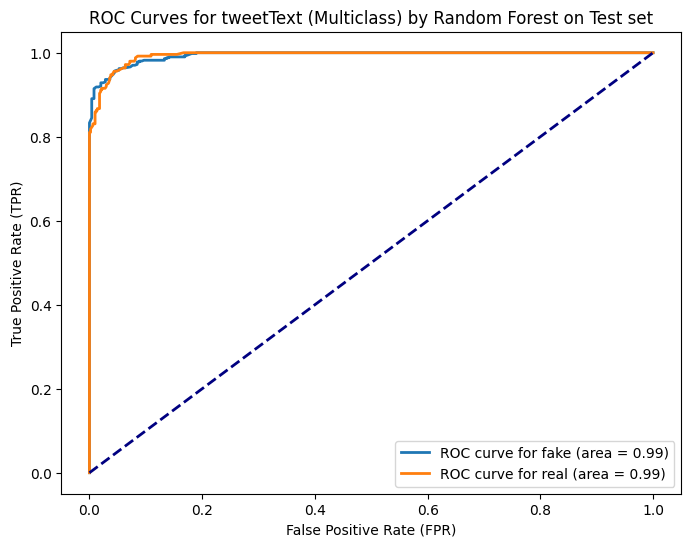

In [249]:
#ROC curve
labels = ['fake', 'real']
y_pred_prob_tweetText = rf_classifier_tweetText.predict_proba(X_test_vectorized_tweetText)
fpr = dict()
tpr = dict()
for i, label in enumerate(labels):
    fpr[label], tpr[label], _ = roc_curve((y_test == label).astype(int), y_pred_prob_tweetText[:, i])
    
plt.figure(figsize=(8, 6))
for label in labels:
    roc_auc = auc(fpr[label], tpr[label])
    plt.plot(fpr[label], tpr[label], lw=2, label=f'ROC curve for {label} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for tweetText (Multiclass) by Random Forest on Test set')
plt.legend(loc="lower right")
plt.show()

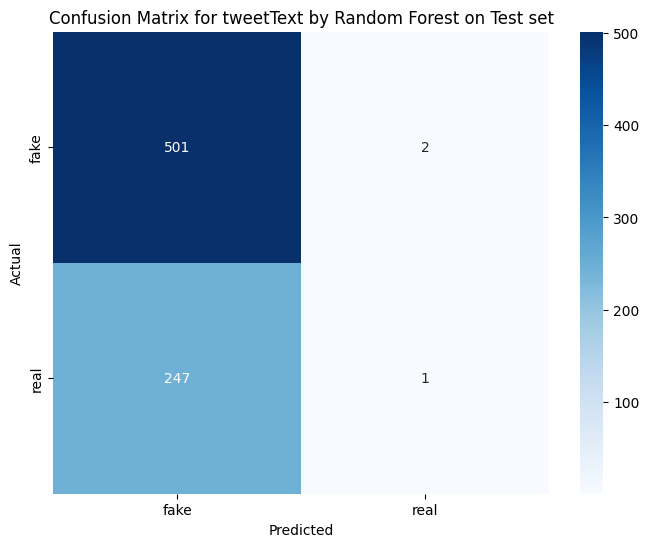

In [250]:
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for tweetText by Random Forest on Test set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

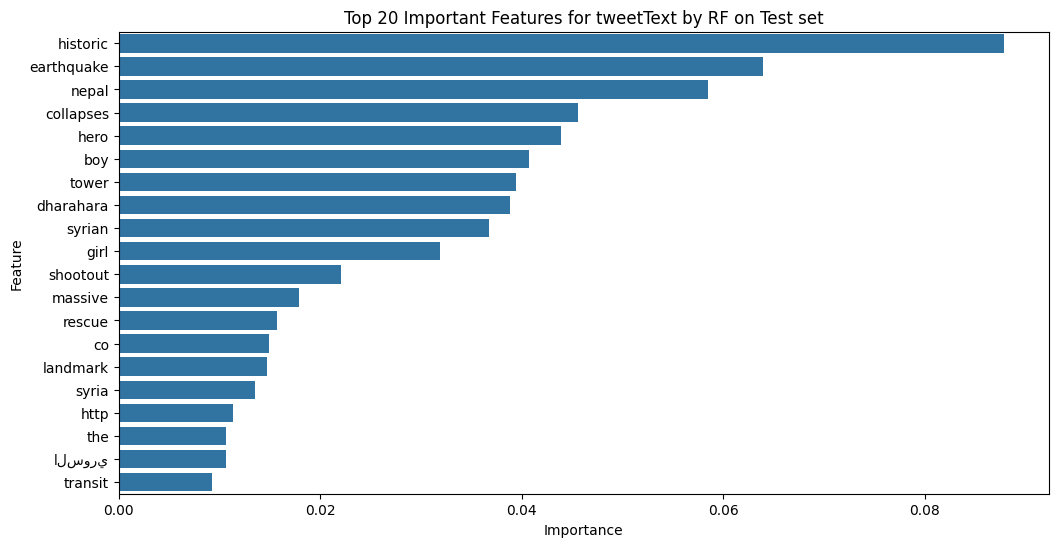

In [251]:
# Feature Importance Bar chart
feature_importance_df_tweetText = pd.DataFrame({'Feature': tfidf_vectorizer_tweetText.get_feature_names_out()})
feature_importance_df_tweetText['Importance'] = rf_classifier_tweetText.feature_importances_
feature_importance_df_tweetText = feature_importance_df_tweetText.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_tweetText.head(20))
plt.title('Top 20 Important Features for tweetText by RF on Test set')
plt.show()

Find the explained variance ratio.

In [252]:
pca_text = PCA(n_components=2)
X_text_pca = pca_text.fit_transform(X_text_tfidf.toarray())
explained_variance_ratio_text = pca_text.explained_variance_ratio_
print("Explained Variance Ratio for PCA on tweetText by Random Forest on Test set:")
print(explained_variance_ratio_text)

Explained Variance Ratio for PCA on tweetText by Random Forest on Test set:
[0.1292077  0.06973672]


### Support Vector Machine

#### Feature Selection
We choose features as tweetText, and language.
Then we compute the Feature importance, and other evaluation metrics like Accuracy, Error rate, Classification report and Confusion matrix for each on the test set.

In [253]:
# Combine 'tweetText' and 'language' into a single feature for selection
X = df_test['tweetText'] + ' ' + df_test['language']
y = df_test['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer_svm = TfidfVectorizer(max_features=5000)
X_train_vectorized = tfidf_vectorizer_svm.fit_transform(X_train)
X_test_vectorized = tfidf_vectorizer_svm.transform(X_test)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_vectorized, y_train)

y_pred = svm_classifier.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print("\nClassification Report by Support Vector Machine on Test set:")
print(classification_report(y_test, y_pred))
print("Accuracy Score by Support Vector Machine on Test set:", accuracy)
print("Error rate by Support Vector Machine on Test set:", error_rate)
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix by Support Vector Machine on Test set:")
print(conf_matrix_svm)


Classification Report by Support Vector Machine on Test set:
              precision    recall  f1-score   support

        fake       0.96      0.98      0.97       503
        real       0.96      0.91      0.93       248

    accuracy                           0.96       751
   macro avg       0.96      0.94      0.95       751
weighted avg       0.96      0.96      0.96       751

Accuracy Score by Support Vector Machine on Test set: 0.9573901464713716
Error rate by Support Vector Machine on Test set: 0.04260985352862845

Confusion Matrix by Support Vector Machine on Test set:
[[494   9]
 [ 23 225]]


#### Dimesionality Reduction
Apply dimensionality reduction using PCA, and then generate scatter plots for the features on test data.

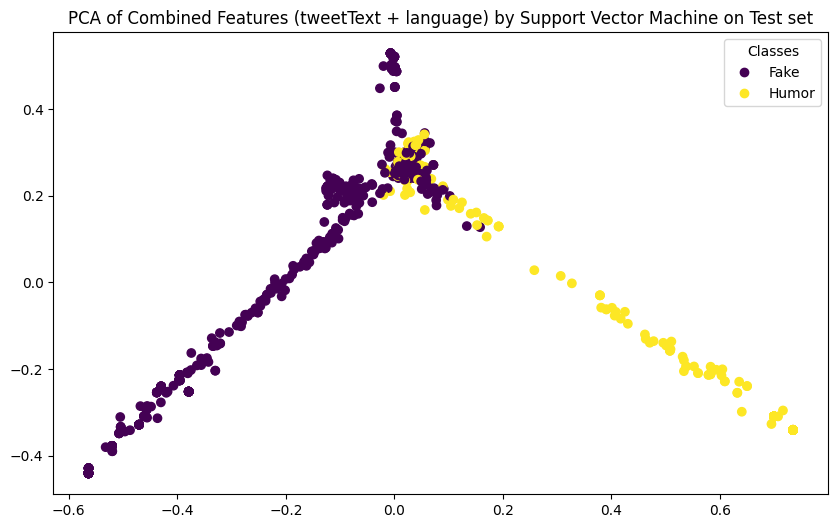

In [254]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_vectorized.toarray())

# Scatter plot of PCA 
plt.figure(figsize=(10, 6))
scatter_pca = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test.map({'fake': 0, 'humor': 1, 'real': 2}), cmap='viridis')
plt.title('PCA of Combined Features (tweetText + language) by Support Vector Machine on Test set')
plt.legend(handles=scatter_pca.legend_elements()[0], title='Classes', labels=['Fake', 'Humor', 'Real'])
plt.show()

#### Evaluation
Now, we will generate the graphs and compare the results on the test data.
* ROC curve
* Confusion matrix
* Feature importance bar graph- Not applicable for this algorithm, SVM.

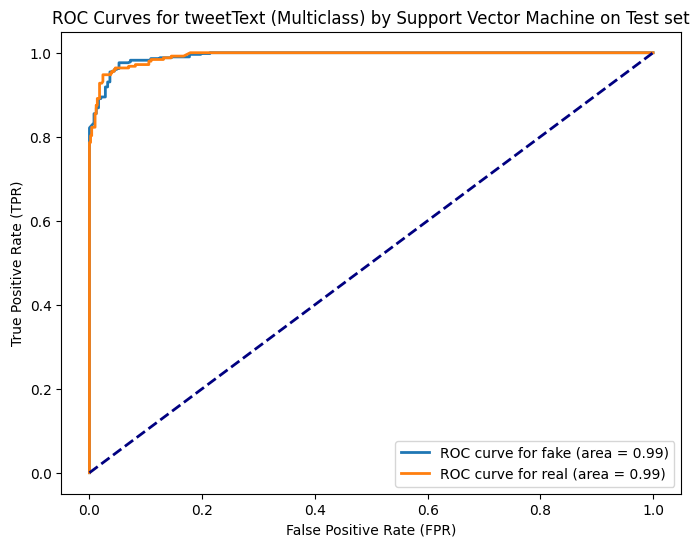

In [255]:
# Select feature- tweetText
X_svm = df_test['tweetText']
y_svm = df_test['label']
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)
tfidf_vectorizer_svm = TfidfVectorizer(max_features=5000)
X_train_vectorized_svm = tfidf_vectorizer_svm.fit_transform(X_train_svm)
X_test_vectorized_svm = tfidf_vectorizer_svm.transform(X_test_svm)
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train_vectorized_svm, y_train_svm)
y_pred_svm = svm_classifier.predict(X_test_vectorized_svm)

# ROC curve
labels_svm = ['fake', 'real']
y_pred_prob_svm = svm_classifier.predict_proba(X_test_vectorized_svm)
fpr_svm = dict()
tpr_svm = dict()

plt.figure(figsize=(8, 6))
for i, label in enumerate(labels_svm):
    fpr_svm[label], tpr_svm[label], _ = roc_curve((y_test_svm == label).astype(int), y_pred_prob_svm[:, i])
    roc_auc_svm = auc(fpr_svm[label], tpr_svm[label])
    plt.plot(fpr_svm[label], tpr_svm[label], lw=2, label=f'ROC curve for {label} (area = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for tweetText (Multiclass) by Support Vector Machine on Test set')
plt.legend(loc="lower right")
plt.show()

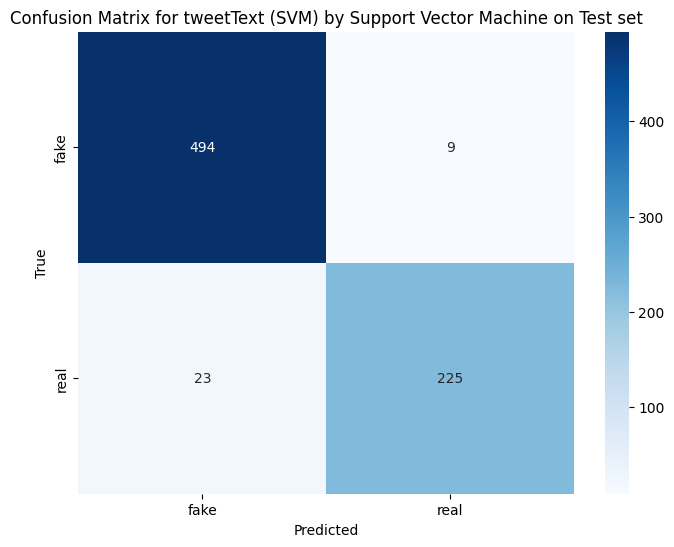

In [256]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=labels_svm, yticklabels=labels_svm)
plt.title('Confusion Matrix for tweetText (SVM) by Support Vector Machine on Test set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Gradient Boosting

#### Feature Selection
We choose features as tweetText, and language.
Then we compute the Feature importance, and other evaluation metrics like Accuracy, Error rate, Classification report and Confusion matrix for both on Test set.

In [257]:
# Select feature- tweetText
X_gb = df_test['tweetText']
y_gb = df_test['label']
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_gb, y_gb, test_size=0.2, random_state=42)
tfidf_vectorizer_gb = TfidfVectorizer(max_features=5000)
X_train_vectorized_gb = tfidf_vectorizer_gb.fit_transform(X_train_gb)
X_test_vectorized_gb = tfidf_vectorizer_gb.transform(X_test_gb)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train_vectorized_gb, y_train_gb)
y_pred_gb = gb_classifier.predict(X_test_vectorized_gb)

feature_importances_gb = gb_classifier.feature_importances_
feature_importance_df_gb = pd.DataFrame({'Feature': tfidf_vectorizer_gb.get_feature_names_out()})
feature_importance_df_gb['Importance'] = feature_importances_gb
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)

print("Feature Importance DataFrame for 'tweetText' by Gradient Boosting on Test set:")
print(feature_importance_df_gb)
print("\nClassification Report by Gradient Boosting on Test set:")
print(classification_report(y_test, y_pred_gb))
accuracy_gb = accuracy_score(y_test, y_pred_gb)
error_rate_gb = 1 - accuracy_gb
print("Accuracy Score by Gradient Boosting on Test set:", accuracy_gb)
print("Error rate by Gradient Boosting on Test set:", error_rate_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix by Gradient Boosting on Test set:")
print(conf_matrix_gb)

Feature Importance DataFrame for 'tweetText' by Gradient Boosting on Test set:
            Feature    Importance
3285          tower  6.629382e-01
1502           girl  8.695467e-02
1441  garissaattack  4.761032e-02
3299        transit  3.772360e-02
803             boy  2.817632e-02
...             ...           ...
1689           here  0.000000e+00
1688    herboldsoul  0.000000e+00
4999           현재까지  0.000000e+00
1728       historic -2.910379e-18
2044        massive -1.335855e-17

[5000 rows x 2 columns]

Classification Report by Gradient Boosting on Test set:
              precision    recall  f1-score   support

        fake       0.94      0.99      0.97       503
        real       0.97      0.88      0.93       248

    accuracy                           0.95       751
   macro avg       0.96      0.94      0.95       751
weighted avg       0.95      0.95      0.95       751

Accuracy Score by Gradient Boosting on Test set: 0.9533954727030626
Error rate by Gradient Boosting on T

#### Dimesionality Reduction
Apply dimensionality reduction using PCA, and then generate scatter plots for the three features on test set.

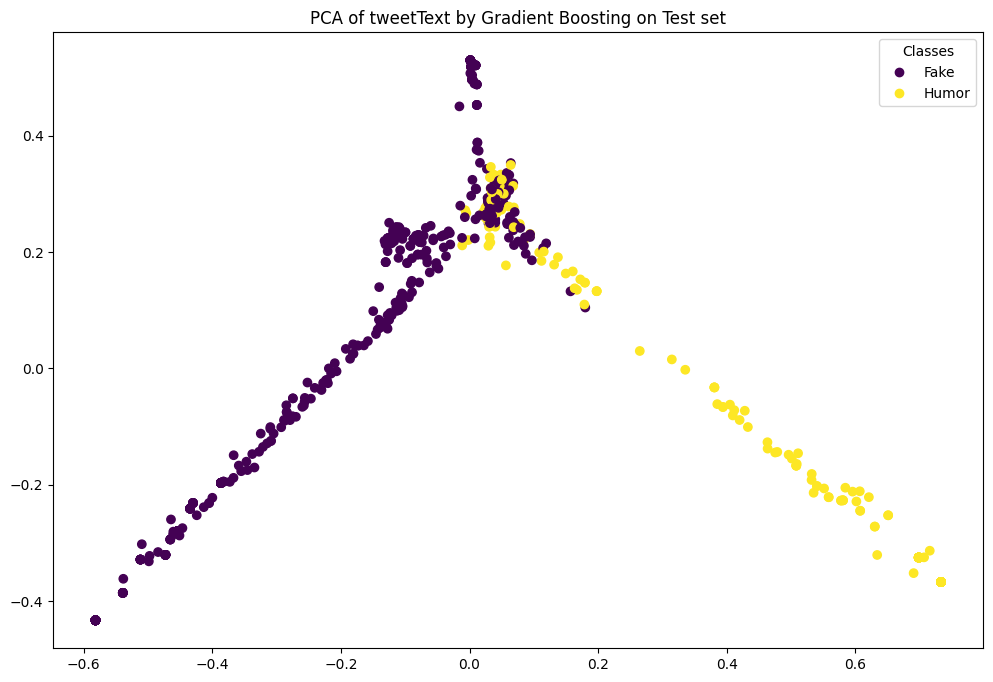

In [258]:
# Scatter plot- 'tweetText' for Gradient Boosting
pca_gb = PCA(n_components=2)
X_text_pca_gb = pca_gb.fit_transform(X_test_vectorized_gb.toarray())

plt.figure(figsize=(12, 8))
scatter_text_gb = plt.scatter(X_text_pca_gb[:, 0], X_text_pca_gb[:, 1], c=y_test_gb.map({'fake': 0, 'real': 1}), cmap='viridis')
plt.title('PCA of tweetText by Gradient Boosting on Test set')
plt.legend(handles=scatter_text_gb.legend_elements()[0], title='Classes', labels=['Fake', 'Humor', 'Real'])
plt.show()

#### Evaluation
Now, we will generate the graphs and compare the results on the test set.
* ROC curve
* Confusion matrix
* Feature importance bar graph- Not applicable for Gradient Boosting.

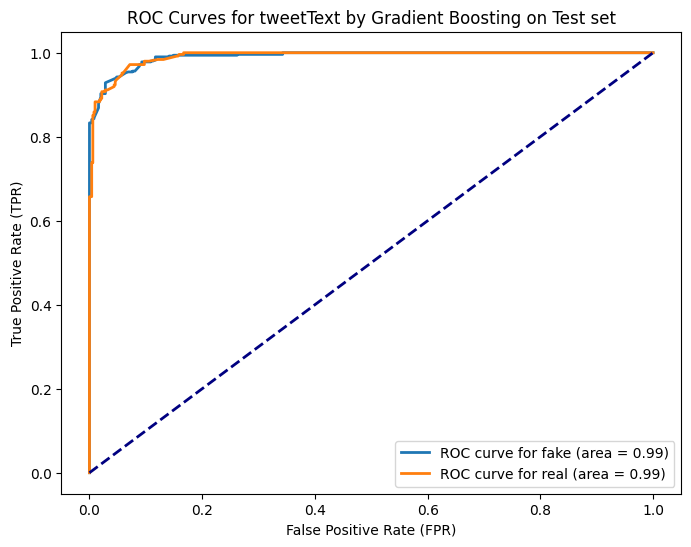

In [259]:
# ROC curve
y_pred_prob_gb = gb_classifier.predict_proba(X_test_vectorized_gb)
fpr_gb = dict()
tpr_gb = dict()
roc_auc_gb = dict()

for i, label in enumerate(gb_classifier.classes_):
    y_true_label = (y_test_gb == label).astype(int)
    fpr_gb[label], tpr_gb[label], _ = roc_curve(y_true_label, y_pred_prob_gb[:, i])
    roc_auc_gb[label] = auc(fpr_gb[label], tpr_gb[label])
    
plt.figure(figsize=(8, 6))
for label in gb_classifier.classes_:
    plt.plot(fpr_gb[label], tpr_gb[label], lw=2, label=f'ROC curve for {label} (area = {roc_auc_gb[label]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for tweetText by Gradient Boosting on Test set')
plt.legend(loc="lower right")
plt.show()

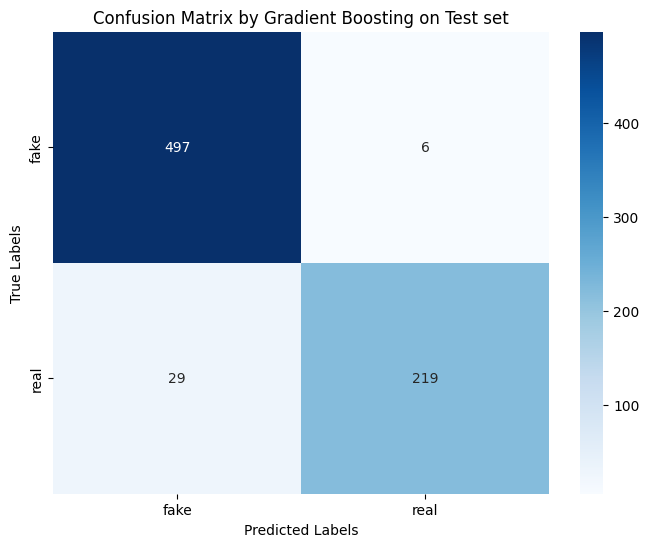

In [260]:
# Confusion Matrix Heatmap
conf_matrix_gb = confusion_matrix(y_test_gb, gb_classifier.predict(X_test_vectorized_gb))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=gb_classifier.classes_, yticklabels=gb_classifier.classes_)
plt.title('Confusion Matrix by Gradient Boosting on Test set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()